In [2]:
pip install --user attention

  Using cached attention-4.1-py3-none-any.whl (8.6 kB)
  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import tensorflow as tf
from numpy import genfromtxt
# import cv2
from sklearn.model_selection import train_test_split


physical_devices = tf.config.list_physical_devices('GPU')

print(physical_devices)


[]


In [3]:
#shuffler
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


X_Dat=[]




for i in range(100): 
  daty = genfromtxt("Input/dat"+str(i+1)+".csv", delimiter=',')# My reference Image
  X_Dat.append(daty[:,:])

X_datnew=np.asarray(X_Dat)

X=X_datnew


##################################################################################

Y=np.zeros((100,9))

for i in range(100):
  my_data = genfromtxt("Labels/lab"+str(i+1)+".csv", delimiter=',')
  Y[i,:]=my_data
    
    
###################################################################################

#Random Shuffling
X,Y=unison_shuffled_copies(X, Y)

# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, :]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid,:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:,:]; y_test=Y[split_valid:,:]

   
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)



(70, 201, 9) (70, 9)
(20, 201, 9) (20, 9)
(10, 201, 9) (10, 9)


In [5]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

from attention import Attention



# Define/compile the model.
model_input = Input(shape=(201, 9))
x = LSTM(64, return_sequences=True)(model_input)
x = Attention(units=32)(x)
x = Dense(9)(x)
model = Model(model_input, x)
model.compile(loss='mae', optimizer='adam')
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 201, 9)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 201, 64)           18944     
                                                                 
 attention_1 (Attention)     (None, 32)                8192      
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 27,433
Trainable params: 27,433
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 [==============================] - 2s 315ms/step - loss: 0.6000 - accuracy: 0.3000 - val_loss: 0.4026 - val_accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 85ms/step - loss: 0.3436 - accuracy: 0.4000 - val_loss: 0.3099 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 0s 79ms/step - loss: 0.2489 - accuracy: 0.3857 - val_loss: 0.2640 - val_accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 75ms/step - loss: 0.2071 - accuracy: 0.3714 - val_loss: 0.2412 - val_accuracy: 0.3000
Epoch 5/100
3/3 [==============================] - 0s 78ms/step - loss: 0.1861 - accuracy: 0.3857 - val_loss: 0.2288 - val_accuracy: 0.3000
Epoch 6/100
3/3 [==============================] - 0s 78ms/step - loss: 0.1748 - accuracy: 0.3714 - val_loss: 0.2138 - val_accuracy: 0.2500
Epoch 7/100
3/3 [==============================] - 0s 78ms/step - loss: 0.1625 - accuracy: 0.3857 - val_loss: 0.1990 - val_accuracy: 0.3500
Epoch 8/100
3/3 [==

Text(0.5, 1.0, 'Training and validation loss')

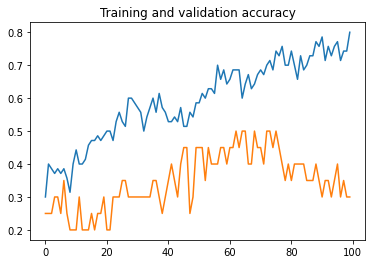

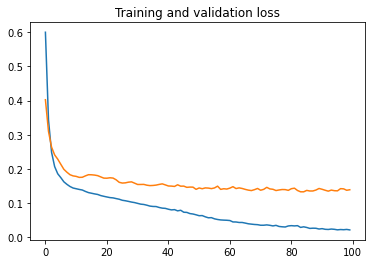

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

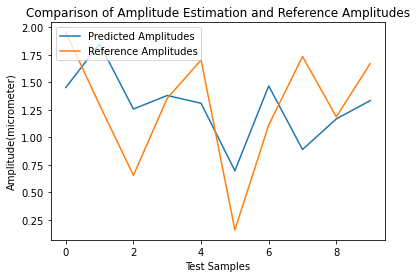

In [9]:
y_predictim=model.predict(X_test)


plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error


print("Mean Absolute Error Achieved: ")
print(((mean_absolute_error(y_test, y_predictim))))

Mean Absolute Error Achieved: 
0.2777128589448003


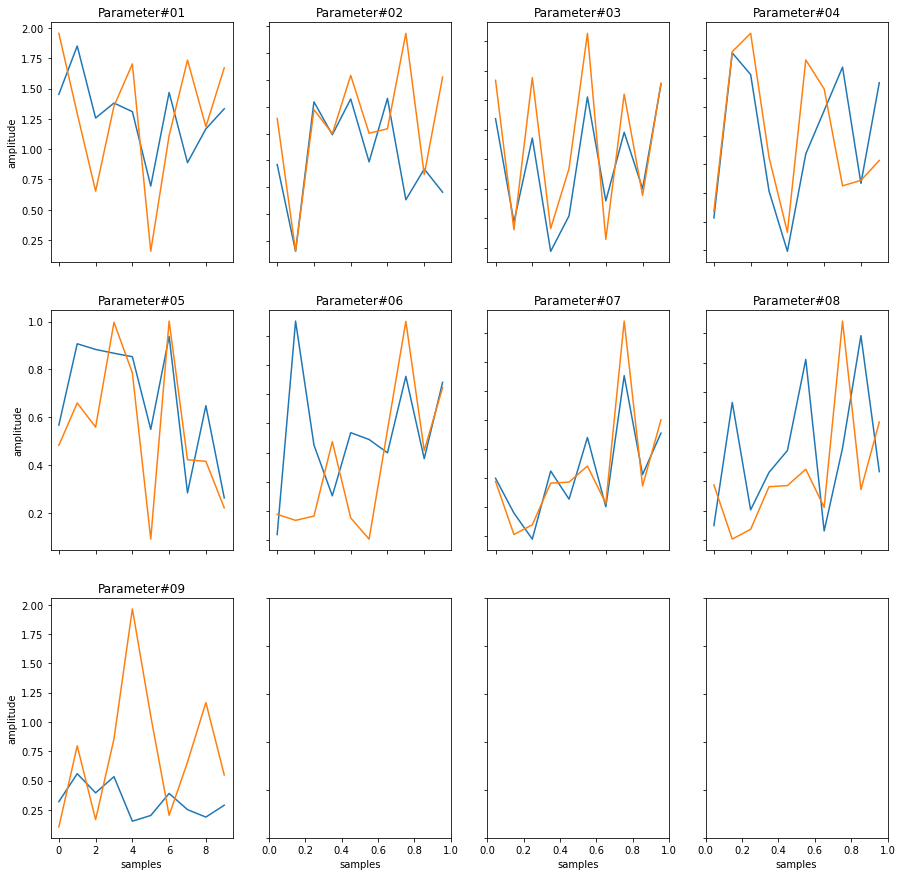

In [11]:
fig, axs = plt.subplots(3, 4,figsize=(15,15))

axs[0, 0].plot(y_predictim[:,0],label="Predicted Amplitudes")
axs[0,0].plot(y_test[:,0],label="Reference Amplitudes")
axs[0, 0].set_title('Parameter#01')
axs[0, 1].plot(y_predictim[:,1],label="Predicted Amplitudes")
axs[0,1].plot(y_test[:,1],label="Reference Amplitudes")
axs[0, 1].set_title('Parameter#02')
axs[0, 2].plot(y_predictim[:,2],label="Predicted Amplitudes")
axs[0,2].plot(y_test[:,2],label="Reference Amplitudes")
axs[0,2].set_title('Parameter#03')
axs[0, 3].plot(y_predictim[:,3],label="Predicted Amplitudes")
axs[0,3].plot(y_test[:,3],label="Reference Amplitudes")
axs[0,3].set_title('Parameter#04')
axs[1, 0].plot(y_predictim[:,4],label="Predicted Amplitudes")
axs[1,0].plot(y_test[:,4],label="Reference Amplitudes")
axs[1, 0].set_title('Parameter#05')
axs[1, 1].plot(y_predictim[:,5],label="Predicted Amplitudes")
axs[1,1].plot(y_test[:,5],label="Reference Amplitudes")
axs[1, 1].set_title('Parameter#06')
axs[1, 2].plot(y_predictim[:,6],label="Predicted Amplitudes")
axs[1,2].plot(y_test[:,6],label="Reference Amplitudes")
axs[1, 2].set_title('Parameter#07')
axs[1, 3].plot(y_predictim[:,7],label="Predicted Amplitudes")
axs[1,3].plot(y_test[:,6],label="Reference Amplitudes")
axs[1,3].set_title('Parameter#08')
axs[2, 0].plot(y_predictim[:,8],label="Predicted Amplitudes")
axs[2,0].plot(y_test[:,7],label="Reference Amplitudes")
axs[2,0].set_title('Parameter#09')


for ax in axs.flat:
    ax.set(xlabel='samples', ylabel='amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()